# *Amazon.com Employee Access Challenge*

## Dataset Description:
The data consists of real historical data collected from 2010 & 2011. Employees are manually allowed or denied access to resources over time. You must create an algorithm capable of learning from this historical data to predict approval/denial for an unseen set of employees.

## File Descriptions
train.csv - The training set. Each row has the ACTION (ground truth), RESOURCE, and information about the employee's role at the time of approval

test.csv - The test set for which predictions should be made. Each row asks whether an employee having the listed characteristics should have access to the listed resource.

## Dataset Information :
When an employee at any company starts work, they first need to obtain the computer access necessary to fulfill their role. This access may allow an employee to read/manipulate resources through various applications or web portals. It is assumed that employees fulfilling the functions of a given role will access the same or similar resources. It is often the case that employees figure out the access they need as they encounter roadblocks during their daily work (e.g. not able to log into a reporting portal). A knowledgeable supervisor then takes time to manually grant the needed access in order to overcome access obstacles. As employees move throughout a company, this access discovery/recovery cycle wastes a nontrivial amount of time and money.

There is a considerable amount of data regarding an employee’s role within an organization and the resources to which they have access. Given the data related to current employees and their provisioned access, models can be built that automatically determine access privileges as employees enter and leave roles within a company. These auto-access models seek to minimize the human involvement required to grant or revoke employee access.

## Column Descriptions

Column Name --> Description

* ACTION --> ACTION is 1 if the resource was approved, 0 if the resource was not
* RESOURCE --> An ID for each resource
* MGR_ID --> The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time
* ROLE_ROLLUP_1 --> Company role grouping category id 1 (e.g. US Engineering)
* ROLE_ROLLUP_2 --> Company role grouping category id 2 (e.g. US Retail)
* ROLE_DEPTNAME --> Company role department description (e.g. Retail)
* ROLE_TITLE --> Company role business title description (e.g. Senior Engineering Retail Manager)
* ROLE_FAMILY_DESC --> Company role family extended description (e.g. Retail Manager, Software Engineering)
* ROLE_FAMILY --> Company role family description (e.g. Retail Manager)
* ROLE_CODE --> Company role code; this code is unique to each role (e.g. Manager)

In [3]:
import pandas as pd # importing pandas 

In [5]:
train = pd.read_csv('amazontrain.csv') # loading train data
test = pd.read_csv('amazontest.csv') # loading test data

In [6]:
# Checking the first 5 rows of train data

train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [7]:
# Checking the first 5 rows of test data

test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [8]:
# Checking the shape of the datasets

print(f'Training data shape : {train.shape}')
print(f'Testing data shape : {test.shape}')

Training data shape : (32769, 10)
Testing data shape : (58921, 10)


In [10]:
# Coparing the column heading of the datasets

print(f'Training data Columns : {list(train.columns)}')
print(f'Testing data Columns : {list(test.columns)}')

Training data Columns : ['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']
Testing data Columns : ['id', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


In [11]:
# *ACTION* is missing in test data, it is the target feature

## *CATBOOST*

In [13]:
# !pip install catboost # To install catboost 

In [14]:
# We can also load data directly from catboost

from catboost.datasets import amazon
traindf, testdf = amazon()

In [15]:
# Checking the shape of the datasets

print(f'Training data shape : {traindf.shape}')
print(f'Testing data shape : {testdf.shape}')

Training data shape : (32769, 10)
Testing data shape : (58921, 10)


In [17]:
traindf.nunique() # To check the unique values in train dataset

# traindf.apply(lambda x:len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [22]:
traindf['MGR_ID'].value_counts() # manager taking care of multiple resources

770      152
2270      99
2594      82
1350      71
2014      67
        ... 
97000      1
81506      1
12517      1
50296      1
22355      1
Name: MGR_ID, Length: 4243, dtype: int64

In [23]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

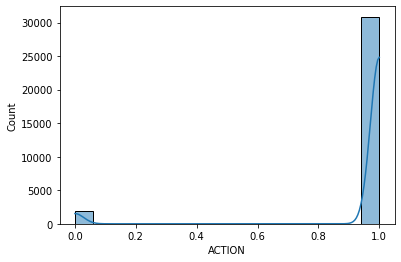

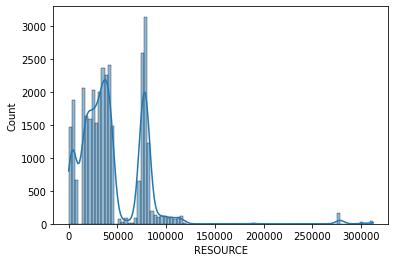

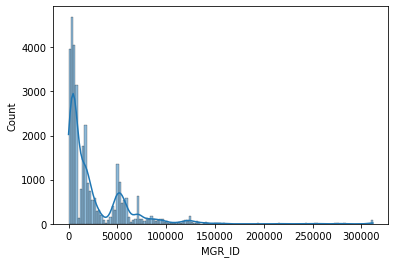

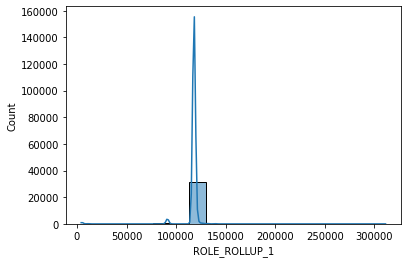

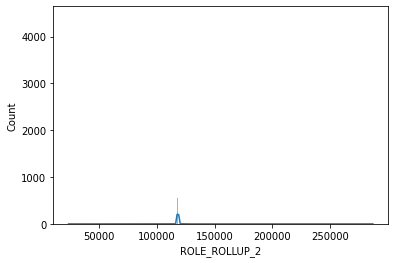

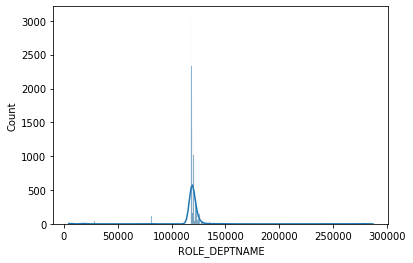

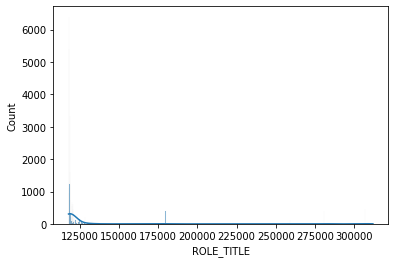

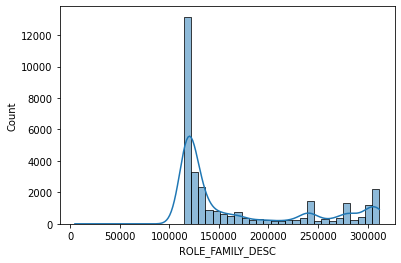

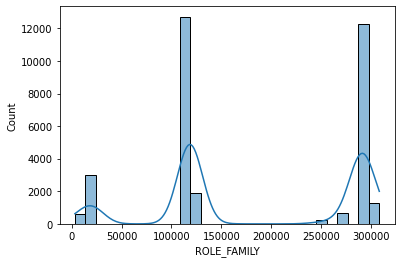

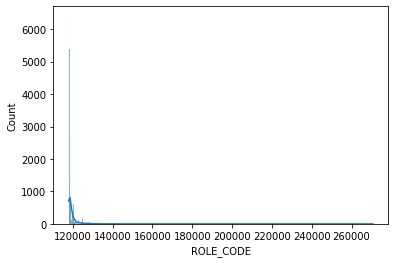

In [31]:
for cols in traindf.describe().columns:
    sns.histplot(traindf[cols].dropna(),kde=True) # Checking the kde distribution of the numeric features
    plt.show()
    
# some plots doesnt show much, we will try to get insights when we take a look at individual features 

In [32]:
traindf['ACTION'].value_counts()

# We could see the target column is not balanced

1    30872
0     1897
Name: ACTION, dtype: int64

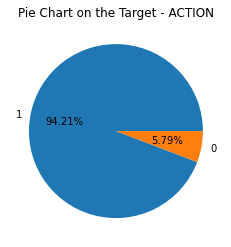

In [39]:
plt.pie(traindf['ACTION'].value_counts().values,labels = traindf['ACTION'].value_counts().index, autopct='%.2f%%')
plt.title('Pie Chart on the Target - ACTION')
plt.show()

ACTION


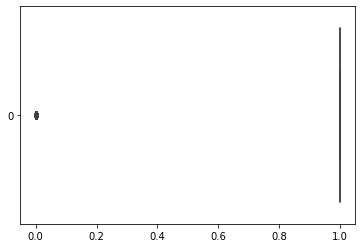

RESOURCE


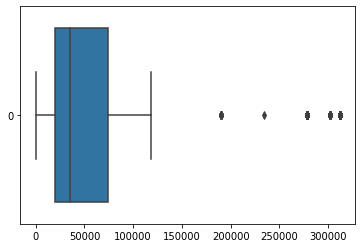

MGR_ID


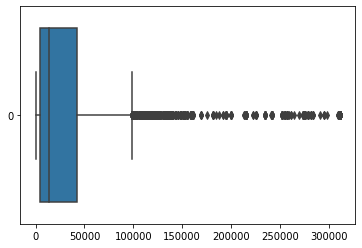

ROLE_ROLLUP_1


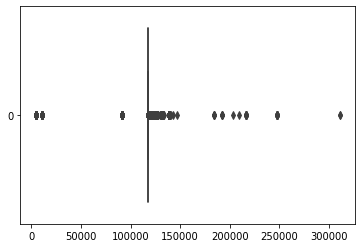

ROLE_ROLLUP_2


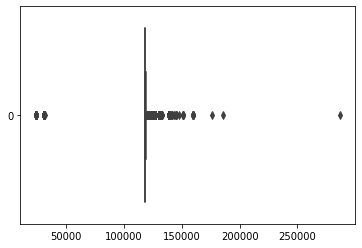

ROLE_DEPTNAME


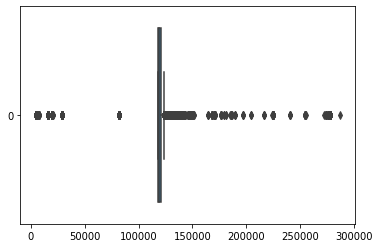

ROLE_TITLE


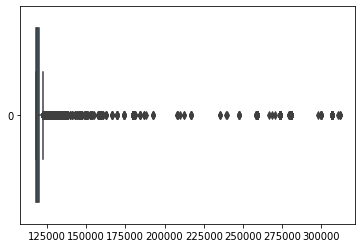

ROLE_FAMILY_DESC


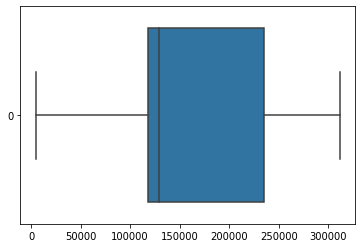

ROLE_FAMILY


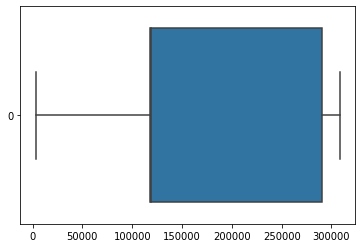

ROLE_CODE


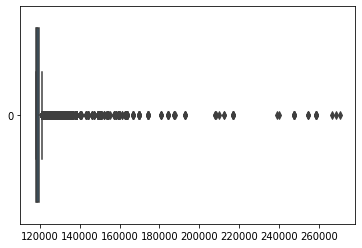

In [44]:
for cols in traindf.describe().columns:
    print(cols)
    sns.boxplot(data=traindf[cols].dropna(),orient='h') # Checking the Boxplot
    plt.show()
    
# some plots doesnt show much, we will try to get insights when we take a look at individual features 

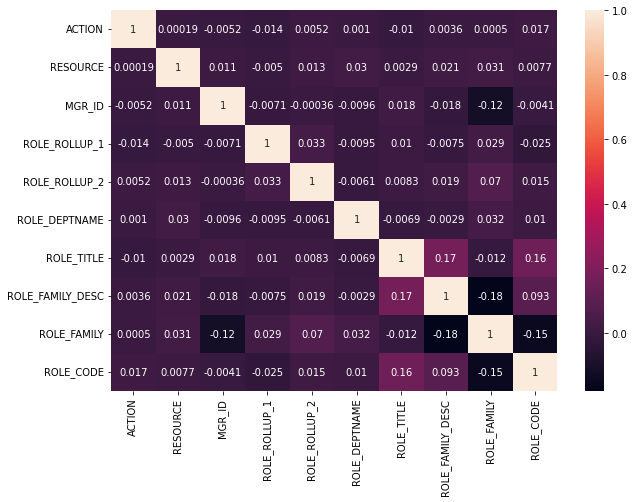

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(traindf.corr(), annot = True) # Checking correalation with heatmap
plt.show()

In [48]:
# We dont have much correlation within the features
# We dont have much correlation with the features and the target

## *MODEL BUILDING*

In [51]:
y = traindf['ACTION']
X = traindf.drop('ACTION',axis = 1)

xtest = testdf.drop('id',axis = 1)

# Splitting into independent and dependent 

In [52]:
from sklearn.model_selection import train_test_split # Importing train test split

xtrain,xval,ytrain,yval =  train_test_split(xtrain, ytrain, test_size=0.25, random_state=0)

In [55]:
from catboost import CatBoostClassifier # importing catboost classifier

In [54]:
params_grid = {
    'loss_function':'Logloss',
    'eval_metric':'AUC',
    'verbose':200,
    'random_seed':1
} # Settings up parameters

In [56]:
cbc = CatBoostClassifier(**params_grid)  # Initializing Catboost Classifier
cbc.fit(xtrain,ytrain,eval_set=(xval,yval),use_best_model=True)
# Fitting xtrain and ytrain with data validation and if we need to save the model or not

Learning rate set to 0.069882
0:	test: 0.5800633	best: 0.5800633 (0)	total: 156ms	remaining: 2m 35s
200:	test: 0.8079619	best: 0.8079619 (200)	total: 1.88s	remaining: 7.46s
400:	test: 0.8283960	best: 0.8287881 (394)	total: 3.69s	remaining: 5.51s
600:	test: 0.8371954	best: 0.8373611 (597)	total: 5.46s	remaining: 3.63s
800:	test: 0.8405570	best: 0.8405889 (789)	total: 7.26s	remaining: 1.8s
999:	test: 0.8445659	best: 0.8446232 (966)	total: 9.18s	remaining: 0us

bestTest = 0.8446232037
bestIteration = 966

Shrink model to first 967 iterations.


In [58]:
# In the above model, Catboost treated the categorical features as numerical ones

categorical_feature = list(range(xtrain.shape[1]))
categorical_feature

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [59]:
params_grid = {
    'loss_function':'Logloss',
    'eval_metric':'AUC',
    'cat_features':categorical_feature,
    'verbose':200,
    'random_seed':1
} # Settings up parameters
# index from 0 - 8 are categorical

In [60]:
cbcwithcategorical = CatBoostClassifier(**params_grid)  # Initializing Catboost Classifier
cbcwithcategorical.fit(xtrain,ytrain,eval_set=(xval,yval),use_best_model=True)
# Fitting xtrain and ytrain with data validation and if we need to save the model or not

Learning rate set to 0.069882
0:	test: 0.5601003	best: 0.5601003 (0)	total: 73.4ms	remaining: 1m 13s
200:	test: 0.8966960	best: 0.8969949 (197)	total: 12.3s	remaining: 48.9s
400:	test: 0.8983275	best: 0.8986222 (378)	total: 25s	remaining: 37.4s
600:	test: 0.8993714	best: 0.8995506 (575)	total: 37.8s	remaining: 25.1s
800:	test: 0.8987823	best: 0.8999387 (689)	total: 49.9s	remaining: 12.4s
999:	test: 0.8980800	best: 0.9001236 (865)	total: 1m 2s	remaining: 0us

bestTest = 0.900123637
bestIteration = 865

Shrink model to first 866 iterations.


## *CROSS VALIDATION*

In [61]:
from catboost import cv # Cross Validation from Catboost

In [62]:
params_grid = {
    'loss_function':'Logloss',
    'eval_metric':'AUC',
    'verbose':200,
    'random_seed':1
} # Settings up parameters

# Splitting into independent and dependent 

y = traindf['ACTION']
X = traindf.drop('ACTION',axis = 1)

xtest = testdf.drop('id',axis = 1)


from catboost import Pool # Importing Pool for data preprocessing

Total_train_data = Pool(data=X, label=y,cat_features=categorical_feature)

In [63]:
scores = cv(pool=Total_train_data, params=params_grid,fold_count=4,seed=0, shuffle=True, stratified=True)

Training on fold [0/4]
0:	test: 0.5967389	best: 0.5967389 (0)	total: 66.7ms	remaining: 1m 6s
200:	test: 0.8723799	best: 0.8724566 (198)	total: 12.8s	remaining: 50.7s
400:	test: 0.8786285	best: 0.8786285 (400)	total: 27s	remaining: 40.4s
600:	test: 0.8825398	best: 0.8826235 (587)	total: 41.3s	remaining: 27.4s
800:	test: 0.8836357	best: 0.8837289 (767)	total: 55.2s	remaining: 13.7s
999:	test: 0.8845606	best: 0.8845606 (999)	total: 1m 9s	remaining: 0us

bestTest = 0.8845606307
bestIteration = 999

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 22.5ms	remaining: 22.5s
200:	test: 0.8770810	best: 0.8770958 (199)	total: 13s	remaining: 51.5s
400:	test: 0.8810057	best: 0.8811216 (385)	total: 28.2s	remaining: 42.1s
600:	test: 0.8810648	best: 0.8811482 (595)	total: 44.3s	remaining: 29.4s
800:	test: 0.8809626	best: 0.8812537 (619)	total: 1m	remaining: 15s
999:	test: 0.8819267	best: 0.8819726 (998)	total: 1m 16s	remaining: 0us

bestTest = 0.8819725766
bestIteration = 998

Trai

In [68]:
# Getting Feature Importance

Feature_Importance = cbcwithcategorical.get_feature_importance(prettified=True)
Feature_Importance

,Feature Id,Importances
0,ROLE_DEPTNAME,17.356174
1,RESOURCE,17.262698
2,ROLE_ROLLUP_2,14.983696
3,MGR_ID,13.284134
4,ROLE_FAMILY_DESC,9.399730
5,ROLE_TITLE,7.721969
6,ROLE_FAMILY,7.274493
7,ROLE_CODE,6.562669
8,ROLE_ROLLUP_1,6.154437


In [71]:
# Importing Visualization Libraries

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

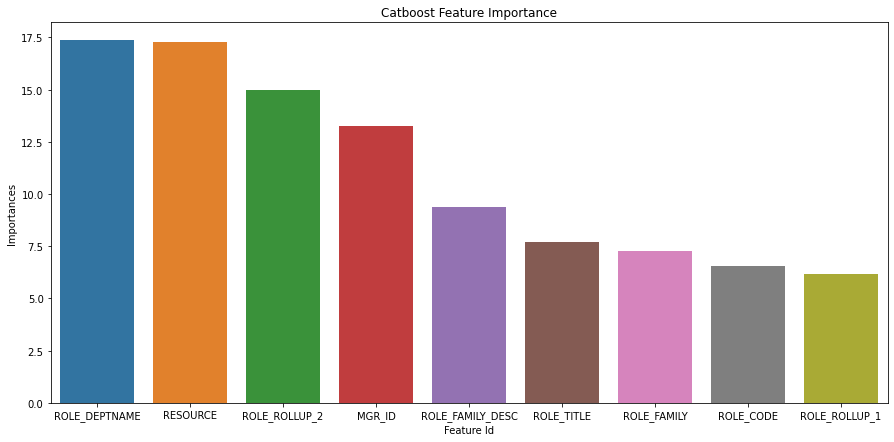

In [79]:
plt.figure(figsize=(15,7))
sns.barplot(x = Feature_Importance['Feature Id'], y = Feature_Importance['Importances'])
plt.title('Catboost Feature Importance')
plt.show()

In [80]:
# Predictions with Probability

pred = cbcwithcategorical.predict_proba(xtest)
pred

array([[0.23698561, 0.76301439],
       [0.00835846, 0.99164154],
       [0.00682406, 0.99317594],
       ...,
       [0.00492646, 0.99507354],
       [0.02111833, 0.97888167],
       [0.01135587, 0.98864413]])

In [81]:
# Predictions without Probability

# pred = cbcwithcategorical.predict(xtest)
# pred

In [83]:
cbcwithcategorical.score(xval,yval) # Checking score on validation sets

0.9578908824606371

In [84]:
traindf.ACTION.value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [ ]:
# We have to treat the imbalance before we proceed further
# We can do UPSAMPLING or DOWNSAMPLING

## *ALTERNATIVELY WE COULD HAVE DONE LOGISTIC REGRESSION*

In [85]:
from sklearn.linear_model import LogisticRegression # Importing Logixtic Regression
from sklearn.preprocessing import LabelEncoder # importing Label Encoder